In [26]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Carregar os CSVs com codificação 'latin1' e separador ';'
df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")

# Realizar merge com base na coluna 'Data'
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

# Exibir as primeiras linhas do DataFrame final
print(dados.head())

# (Opcional) Salvar o resultado em um novo CSV
dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")


#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

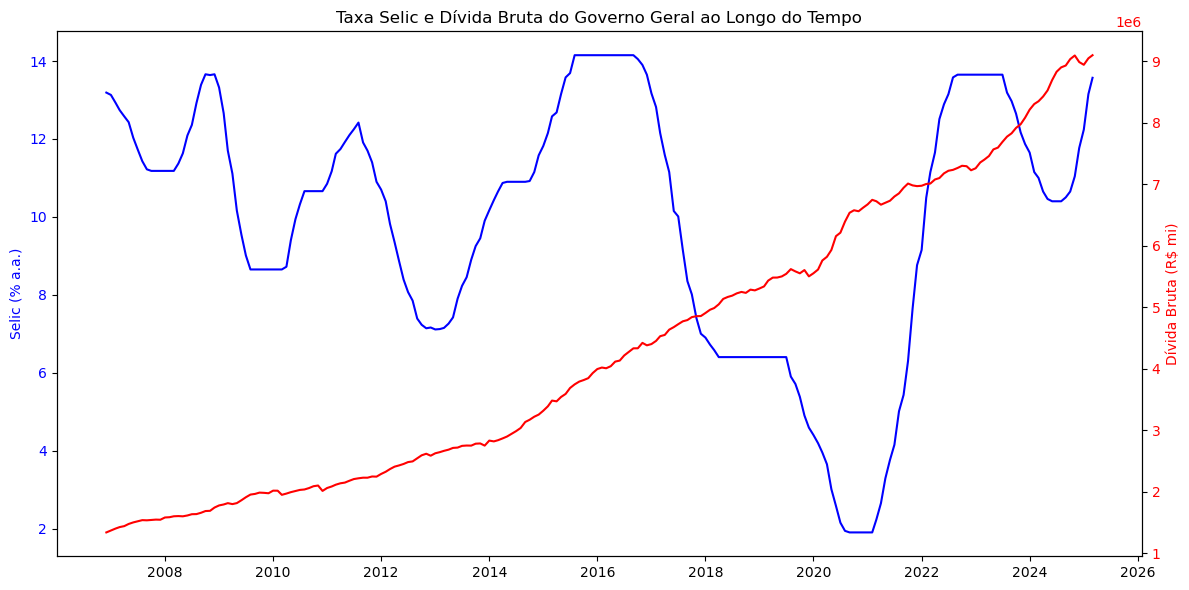

In [28]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo  Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título e layout
plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

In [29]:
# agora veremos qual é a relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

# Converter colunas numéricas
dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

# Calcular a variação mensal da dívida (aumento)
dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

# Remover a primeira linha com NaN na diferença
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

# Calcular correlação de Pearson entre Selic e aumento da dívida
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

# Mostrar o resultado
print(correlacao)

-0.05568478790529951


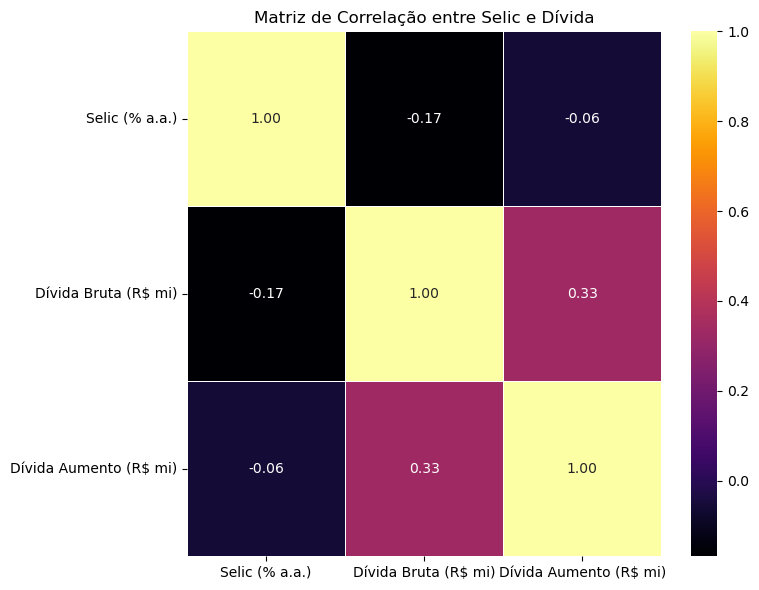

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")
dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)
dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

# Criar matriz de correlação
matriz_correlacao = dados[["Selic (% a.a.)", "Dívida Bruta (R$ mi)", "Dívida Aumento (R$ mi)"]].corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Selic e Dívida")
plt.tight_layout()
plt.show()
